## FIFA '21 Dataset. 
#### Cleaning and Transformation.

##### Importing necessary libraries.

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # plotting graphs

In [50]:
# loading the dataset. 'low_memory=False' argument used to prevent memory optimisation during initial load which may cause issues with data types.
df = pd.read_csv("fifa21 raw data v2.csv", low_memory=False)

##### Inspecting the data.

In [51]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [52]:
# changing the display settings to ensure a comprehensive view of the dataframe.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [53]:
df.shape

(18979, 77)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

##### Descriptive statistics.
The describe() method is used to obtain summary statistics of numerical data in the dataframe. 

In [55]:
df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.

In [56]:
# checking for missing values in each column. 
obj = df.isnull().sum()
for key,value in obj.iteritems():
    print(key ,value)

ID 0
Name 0
LongName 0
photoUrl 0
playerUrl 0
Nationality 0
Age 0
↓OVA 0
POT 0
Club 0
Contract 0
Positions 0
Height 0
Weight 0
Preferred Foot 0
BOV 0
Best Position 0
Joined 0
Loan Date End 17966
Value 0
Wage 0
Release Clause 0
Attacking 0
Crossing 0
Finishing 0
Heading Accuracy 0
Short Passing 0
Volleys 0
Skill 0
Dribbling 0
Curve 0
FK Accuracy 0
Long Passing 0
Ball Control 0
Movement 0
Acceleration 0
Sprint Speed 0
Agility 0
Reactions 0
Balance 0
Power 0
Shot Power 0
Jumping 0
Stamina 0
Strength 0
Long Shots 0
Mentality 0
Aggression 0
Interceptions 0
Positioning 0
Vision 0
Penalties 0
Composure 0
Defending 0
Marking 0
Standing Tackle 0
Sliding Tackle 0
Goalkeeping 0
GK Diving 0
GK Handling 0
GK Kicking 0
GK Positioning 0
GK Reflexes 0
Total Stats 0
Base Stats 0
W/F 0
SM 0
A/W 0
D/W 0
IR 0
PAC 0
SHO 0
PAS 0
DRI 0
DEF 0
PHY 0
Hits 2595


C:\Users\glord\AppData\Local\Temp\ipykernel_16260\2670744239.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in obj.iteritems():


In [57]:
# getting columns whose data type is 'object'.
for i in df.columns:
    if df[i].dtype == "object":
        print(i)

Name
LongName
photoUrl
playerUrl
Nationality
Club
Contract
Positions
Height
Weight
Preferred Foot
Best Position
Joined
Loan Date End
Value
Wage
Release Clause
W/F
SM
A/W
D/W
IR
Hits


##### Data Transformation.
1. From the inspection of the data frame, it was noticed that the Height column contained mixed metrics for the height values and the data type was object. The column was transformed to a uniform unit (cm) and integer values. Same as the Height column, the Weight column had mixed metrics of kg and lbs. The column was also transformed to a singular unit (kg) with integer values.  

In [58]:
# checking the distribution of the height values.
df["Height"].value_counts()

180cm    1474
178cm    1250
185cm    1182
183cm    1148
175cm    1091
188cm     931
182cm     887
184cm     817
186cm     816
177cm     738
187cm     711
181cm     708
176cm     670
179cm     662
173cm     610
190cm     579
174cm     540
170cm     495
191cm     466
189cm     462
172cm     458
193cm     320
192cm     298
171cm     277
168cm     217
169cm     178
194cm     177
196cm     141
195cm     138
167cm     114
165cm      94
166cm      63
197cm      58
198cm      41
164cm      31
163cm      19
199cm      17
162cm      13
201cm      13
6'0"        8
160cm       7
200cm       7
161cm       6
5'11"       6
202cm       4
6'2"        4
6'3"        4
5'10"       4
158cm       3
5'9"        3
6'1"        3
5'7"        3
159cm       2
6'4"        2
203cm       2
156cm       1
206cm       1
6'5"        1
157cm       1
5'4"        1
5'6"        1
155cm       1
Name: Height, dtype: int64

In [59]:
# define a custom function to transform height values
# import re module to use regular expression for pattern matching and text manipulation
import re
def convert_height_to_cm(height):
    # check if the value is in cm
    if 'cm' in height:
        # extract numeric value and return as an integer
        return int(height.replace('cm', '').strip())
    
    # check if the value is in feet and inches format
    elif "'" in height:
        # use regular expression to find feet and inches
        match = re.match(r"(\d+)'(\d+)\"", height)
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2))
            # convert feet to inches and add the remaining inches
            total_inches = (feet * 12) + inches
            # convert inches to centimeters
            return round(total_inches * 2.54)
    
    # if format is unrecognized, return None or NaN
    return None

In [60]:
# applying the conversion function to the entire height column
df["Height"] = df["Height"].apply(convert_height_to_cm)

In [61]:
# df["Height"].value_counts()

In [62]:
# checking the distribution of the weight values
df["Weight"].value_counts().head(10)

70kg    1495
75kg    1457
80kg    1108
72kg    1022
78kg     991
74kg     956
73kg     954
77kg     889
76kg     878
68kg     795
Name: Weight, dtype: int64

In [63]:
# define a function to convert weight values
def convert_weight(weight):
     # check if the value is in kg
    if 'kg' in weight:
        # extract numeric value and return as an integer
        return int(weight.replace('kg', '').strip())
    
    # check if the value is in pounds
    elif "lbs" in weight:
        w = int(weight.replace('lbs', '').strip())
        return round(w * 0.453592)
    
    # if format is unrecognized, return None or NaN
    return None

In [64]:
# applying the conversion function to the entire weight column
df["Weight"] = df["Weight"].apply(convert_weight)

In [65]:
df["Weight"].value_counts().head(10)

70    1496
75    1459
80    1109
72    1024
78     995
74     957
73     956
77     893
76     880
68     795
Name: Weight, dtype: int64

In [66]:
df.rename(columns= {'Height' : 'Height(cm)', 'Weight' : 'Weight(kg)'}, inplace = True)

In [67]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


2. Removing unnecessary newline characters from all columns that have them.


In [68]:
# checking all columns with newline characters using a loop to prevent and handle formatting issues. 
col_with_newlines = []
for col in df.columns:
    if df[col].astype(str).str.contains('\n').any():
        col_with_newlines.append(col)

print("Columns with newline characters:", col_with_newlines)


Columns with newline characters: ['Club']


In [69]:
# replacing all newline characters in the club column with an empty string 
df["Club"].replace(to_replace=r'\n', value='', regex=True, inplace=True)

In [70]:
# verifying that there are no more newline characters in the dataframe
# c_with_newlines = []
# for col in df.columns:
#     if df[col].astype(str).str.contains('\n').any():
#         c_with_newlines.append(col)
col_with_newlines

['Club']

3. Based on the 'Joined' column, checking which players have been playing at a club for more than 10 years.

In [95]:
# checking the distribution of joined values
# df["Joined"].value_counts()

In [72]:
# extracting the year from joined column, changing it to integer value, and creating a new column for the extracted year. 
df["Joined_year"] = df["Joined"].str[-4:].astype(int)

In [73]:
# minimum value of joined year
df["Joined_year"].min()

1998

In [74]:
# creating a new column for the number of years each player has been at a club
df["Duration_of_membership"] = 2024 - df["Joined_year"]

In [75]:
# maximum value of duration of club membership
df["Duration_of_membership"].max()

26

In [96]:
# getting names of players with membership duration of more than 10 years
# df[df["Duration_of_membership"] > 10].LongName

In [77]:
# df["LongName"].value_counts()

4. 'Value', 'Wage' and "Release Clause' are string columns thus they are to be converted to numbers. For example, "M" in the value column is Million, so multiply the row values by 1,000,000, etc.

In [78]:
# checking distribution of value figures
df["Value"].value_counts()

€1.2M      582
€1.1M      559
€1.3M      534
€1.6M      532
€1M        497
€1.4M      467
€1.5M      392
€325K      392
€475K      386
€500K      383
€550K      338
€1.9M      332
€300K      331
€375K      318
€525K      318
€350K      310
€275K      306
€725K      297
€400K      294
€1.8M      283
€600K      275
€575K      265
€700K      260
€425K      257
€450K      254
€825K      250
€1.7M      249
€0         248
€850K      243
€2.1M      238
€625K      236
€2.3M      222
€900K      218
€250K      214
€750K      210
€2M        204
€2.2M      184
€775K      180
€675K      180
€925K      168
€800K      167
€975K      165
€875K      163
€2.4M      160
€2.7M      157
€240K      154
€2.5M      153
€5.5M      149
€650K      139
€210K      137
€950K      133
€200K      127
€3M        125
€6.5M      122
€110K      121
€190K      120
€3.1M      117
€220K      116
€2.6M      116
€230K      116
€6M        114
€5M        113
€2.9M      110
€2.8M      103
€3.6M      100
€150K       99
€130K     

In [79]:
# define function to remove Euro sign from column entries to facilitate processing
def strip_euro_sign(val):
    if '€' in val:
        return val.replace('€', '').strip()
    return None

In [80]:
# applying function to value, wage, and release clause columns
df["Value"] = df["Value"].apply(strip_euro_sign)
df["Wage"] = df["Wage"].apply(strip_euro_sign)
df["Release Clause"] = df["Release Clause"].apply(strip_euro_sign)

In [81]:
# define function to transform values from string units to integer figures
def to_numbers(num):
    if 'K' in num:
        k = float(num.replace('K', '').strip())
        return int(k * 1000)
    elif 'M' in num:
        m = float(num.replace('M', '').strip())
        return int(m * 1000000)
    return int(num)

In [82]:
# applying function to value, wage, and release clause columns
df["Value"] = df["Value"].apply(to_numbers)
df["Wage"] = df["Wage"].apply(to_numbers)
df["Release Clause"] = df["Release Clause"].apply(to_numbers)

In [83]:
# renaming columns to indicate unit of values
df.rename(columns= {'Value' : 'Value(€)'}, inplace = True)
df.rename(columns= {'Release Clause' : 'Release Clause(€)', 'Wage' : 'Wage(€)'}, inplace = True)

5. Some columns have 'star' characters. Striping those columns of these stars and then making the columns numerical.

In [84]:
# distribution of SM values
df["SM"].value_counts()

2★    9142
3★    6577
1★    2075
4★    1130
5★      55
Name: SM, dtype: int64

In [85]:
# checking all columns with star characters using a loop to prevent and handle formatting issues. 
col_with_stars = []
for col in df.columns:
    if df[col].astype(str).str.contains('★').any():
        col_with_stars.append(col)

print("Columns with star characters:", col_with_stars)


Columns with star characters: ['W/F', 'SM', 'IR']


In [86]:
# define function to remove star sign from column entries to facilitate processing
def strip_stars(star):
    if '★' in star:
        s = star.replace('★', '').strip()
        return int(s) if s else 0
    return None

In [87]:
# applying function to W/F, SM, and IR columns
df["W/F"] = df["W/F"].apply(strip_stars)
df["SM"] = df["SM"].apply(strip_stars)
df["IR"] = df["IR"].apply(strip_stars)

In [88]:
# renaming columns to indicate unit
df.rename(columns= {'W/F' : 'W/F(★)', 'SM' : 'SM(★)', 'IR' : 'IR(★)'}, inplace = True)

6. Determining players that are highly valuable but still underpaid (on low wages).

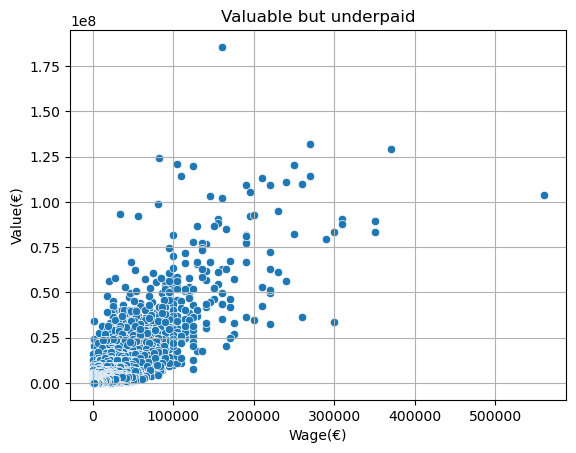

In [89]:
# plotting Value and Wage values to observe trend
sns.scatterplot(x = 'Wage(€)', y = 'Value(€)', data=df)
plt.title('Valuable but underpaid')
plt.xlabel('Wage(€)')
plt.ylabel('Value(€)')
plt.grid(True)
plt.show()

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      18979 non-null  int64 
 1   Name                    18979 non-null  object
 2   LongName                18979 non-null  object
 3   photoUrl                18979 non-null  object
 4   playerUrl               18979 non-null  object
 5   Nationality             18979 non-null  object
 6   Age                     18979 non-null  int64 
 7   ↓OVA                    18979 non-null  int64 
 8   POT                     18979 non-null  int64 
 9   Club                    18979 non-null  object
 10  Contract                18979 non-null  object
 11  Positions               18979 non-null  object
 12  Height(cm)              18979 non-null  int64 
 13  Weight(kg)              18979 non-null  int64 
 14  Preferred Foot          18979 non-null  object
 15  BO

In [91]:
df.head(10)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined_year,Duration_of_membership
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2004,20
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,2018,6
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2014,10
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",NaN,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,2015,9
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",NaN,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,2017,7
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91,91,FC Bayern München,2014 ~ 2023,ST,184,80,Right,91,ST,"Jul 1, 2014",NaN,111000000,240000,132000000,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,89,84,76,86,85,391,81,49,94,79,88,88,96,35,42,19,51,15,6,12,8,10,2195,457,4,4,High,Medium,4,78,91,78,85,43,82,248,2014,10
6,209331,M. Salah,Mohamed Salah,https://cdn.sofifa.com/players/209/331/21_60.png,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,28,90,90,Liverpool,2017 ~ 2023,RW,175,71,Left,90,RW,"Jul 1, 2017",NaN,120500000,250000,144300000,392,79,91,59,84,79,406,90,83,69,75,89,460,94,92,91,92,91,393,80,69,85,75,84,376,63,55,91,84,83,90,122,38,43,41,62,14,14,9,11,14,2211,470,3,4,High,Medium,3,93,86,81,90,45,75,246,2017,7
7,212831,Alisson,Alisson Ramses Becker,https://cdn.sofifa.com/players/212/831/21_60.png,http://sofifa.com/player/212831/alisson-ramses...,Brazil,27,90,91,Liverpool,2018 ~ 2024,GK,191,91,Right,90,GK,"Jul

In [92]:
df_final = df.copy()

In [93]:
df_final.to_csv('Cleaned FIFA.csv')

In [94]:
df_final.head(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined_year,Duration_of_membership
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2004,20
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,2018,6
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2014,10
